# Programmatically accessing, processing, and visualizing USGS 3D Elevation Program (3DEP) data


<h2>Table of Contents<span class="tocSkip"></span></h2>
<div class="toc"><ul class="toc-item"><li><span><a href="#Authors" data-toc-modified-id="Authors-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Authors</a></span></li><li><span><a href="#Purpose" data-toc-modified-id="Purpose-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Purpose</a></span></li><li><span><a href="#Funding" data-toc-modified-id="Funding-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Funding</a></span></li><li><span><a href="#Keywords" data-toc-modified-id="Keywords-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Keywords</a></span></li><li><span><a href="#Citation" data-toc-modified-id="Citation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Citation</a></span></li><li><span><a href="#Setup" data-toc-modified-id="Setup-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Library-Imports" data-toc-modified-id="Library-Imports-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Library Imports</a></span></li><li><span><a href= "Define-Functions" data-toc-modified-id="Define-Functions-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Define Functions</a></span></ul><li><span><a href="#Data-Access-and-Visualization" data-toc-modified-id="Data-Access-and-Visualization-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Data Access and Visualization</a></span><ul class="toc-item"><li><span><a href="#Access-3DEP-Data" data-toc-modified-id="Access-3DEP-Data-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Access 3DEP Data</a></span></li><li><span><a href="#Create-Interactive-Ipyleaflet-Map-And-Define-AOI" data-toc-modified-id="Create-Interactive-Ipyleaflet-Map-And-Define-AOI-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Create Interactive Ipyleaflet Map and Define AOI</a></span></li><li><span><a href="Find-Intersecting-3DEP-Polygons" data-toc-modified-id="Find-Interseciting-3DEP-Polygons-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Find Intersecting 3DEP Polygons</a></span></li></ul></li><li><span><a href="#Data-Processing" data-toc-modified-id="Data-Processing-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Data Processing</a></span><ul class="toc-item"></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Resources" data-toc-modified-id="Resources-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Resources</a></span></li></div>
    

<h2>Authors</h2>
<a id='#Authors'></a>

<h2>Purpose</h2>
<a id='#Purpose'></a>

The United States Geological Survey's 3-D Elevation Program (3DEP)is an ongoing effort to provide high-quality topographic -- light detection and ranging (lidar) -- data for the entire conterminous United States, Hawaii, the U.S territories, and Interferometric Synthetic Aperture Radar (IfSAR) for Alaska over an 8-year period. Data acquisition is ongoing, with over 1800 3DEP datasets consisting of >42 trillion points covering an area of > 6 million $km^{2}$ already available for use.

3DEP point cloud data can be downloaded on the web from a variety of resources including the <a href="https://portal.opentopography.org/datasets">OpenTopography Portal</a> (restricted to academic users) and the <a href="https://prd-tnm.s3.amazonaws.com/LidarExplorer/index.html#/process">USGS Lidar Explorer</a>. Due to limited computational resources, these web services implement limits on the spatial extent over which point cloud data may be accessed for a single job. In some cases, however, it may benefit users seeking raw, uprocessed point cloud data over large extents to be able to programmatically access, process, and visualize 3DEP point cloud data from a specific area of interest on their local workstation without the web service limitations. 

This Jupyter notebook is one of two developed focusing on enhancing access and usability of 3DEP data and derivative products. This notebook provides functions, pipelines, and overall workflow for effectively and efficiently accessing documents a Python-based workflow for accessing, processing, and visualizing 3DEP data, leveraging available APIs and cloud resources.

<h4>Specific features of this notebook</h4>

- Users may (1) select an area of interest (AOI) directly in an interactive map within this notebook; (2) import a shapefile or geoJSON file; or (3) directly input coordinate boundaries for their region of interest.

- The relevant 3DEP dataset is accessed via the Amazon Web Services (AWS) API and point cloud data (stored as Entwine tiles) are accessed programmatically, clipped to the user-defined AOI and made available for subsequent processing.

- Flexibile and customizable PDAL pipelines are available for classifying, processing, and computing derivate products based on user-defined specifications. 

- Point cloud data and/or derivative products are saved to local directory or local path defined by user.

<h4>Additional resources</h4>
An additional Python-based workflow has been developed and is availble in Jupyter Notebook format for <a href="http://localhost:8888/notebooks/Programmatically_accessing_3DEP_data_using_USGS_7.5_Quadrangles.ipynb"> accessing 3DEP point cloud data for specific USGS 7.5' quadrangle footprints</a>.

<h2>Funding</h2>
<a id='#Funding'></a>
OpenTopography is supported by the National Science Foundation under Award Numbers 1948997, 1948994 & 1948857. Funding for 3DEP workflow developement entitled "Enhancing usability of 3DEP data and web services with Jupyter notebooks"  was provided through the Community for Data Integration (CDI).

<h2>Keywords</h2>
<a id='#Keywords'></a>

keywords=["OpenTopography","USGS", "3DEP", "PDAL"]

<h2>Citation</h2>


## 6. Setup

<h3> 6.1 Library Imports</h3>
<a id='#Library-Imports-6.1'></a>


In [1]:
import os
import json
import pdal
import numpy as np
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import ipyleaflet
from ipyleaflet import Map, GeoJSON, basemaps, basemap_to_tiles, projections
import ipywidgets as widgets
from ipywidgets import Layout, interact, interactive, fixed, interact_manual, HBox, VBox, Label
from osgeo import gdal
from shapely.geometry import shape, Point, Polygon
from shapely.ops import transform
import requests
import pyproj
from pyproj.aoi import AreaOfInterest
from pyproj.database import query_utm_crs_info
from tqdm import tqdm
import wget

<h3>6.2 Define Functions</h3>
<a id='#Define-Functions-6.2'></a>

The functions below are used throughout the rest of the notebook and are included here for clarity.

```gcs_to_proj()``` is a function to project from geographic coordinates, WGS84 (EPSG: 4326), to Web Mercator projection (EPSG: 3857).

```handle_draw()``` is a function for interactive drawing on ipyleaflet maps and storing the polygon for use in requesting point cloud data.

```build_pdal_pipeline()``` is a function used to construct the pdal pipeline to request/process the point cloud data from AWS

These functions can be modified as the user sees fit; however, they are designed to work 'out of the box'.

In [2]:
def gcs_to_proj(poly):
    """
    Function for reprojecting polygon shapely object from geographic coordinates (EPSG:4326) 
    to Web Mercator (EPSG3857)). 
    """
    wgs84 = pyproj.CRS("EPSG:4326")
    web_mercator = pyproj.CRS("EPSG:3857")
    project = pyproj.Transformer.from_crs(wgs84, web_mercator, always_xy=True).transform
    user_poly_proj3857 = transform(project, poly)
    return(user_poly_proj3857)

def handle_draw(target, action, geo_json):
    """
    Allow user to draw area of interest (AOI) on interactive ipyleaflet map.
    
    Parameters:
        extent_epsg3857: polygon for user-defined AOI
        usgs_3dep_dataset_name: name of 3DEP dataset which AOI overlaps
        resolution:
    """
    geom = dict(geo_json['geometry'])
    user_poly = shape(geom)
    user_poly_proj3857 = gcs_to_proj(user_poly)
    print('AOI is valid and has boundaries of ', user_poly_proj3857.bounds)
    user_AOI.append((user_poly, user_poly_proj3857))  #for various reasons, we need user AOI in GCS and EPSG 3857

def build_pdal_pipeline(extent_epsg3857, usgs_3dep_dataset_name, pc_resolution, filterNoise = False,
                        reclassify = True, savePointCloud = True, pc_outName = 'filter_test', pc_outType = 'laz'):

    """
    Build pdal pipeline for requesting, processing, and saving point cloud data.
    
    Parameters:
        extent_epsg3857: Polygon for user-defined AOI in Web Mercator projection (EPS:3857)
                         usgs_3dep_dataset_name: name of 3DEP dataset which AOI overlaps. Polygon is generated 
                         either through the 'handle_draw' methor or by inputing their own coordinates.
                         This parameter is set automatically when the user-defined AOI is chosen.
        usgs_3dep_dataset_name: Name of the 3DEP dataset that the data will be obtained. This parameter is set 
                                automatically when the user-defined AOI is chosen.
        pc_resolution: The desired resolution of the pointcloud based on the following definition:
        
                        Source: https://pdal.io/stages/readers.ept.html#readers-ept
                            A point resolution limit to select, expressed as a grid cell edge length. 
                            Units correspond to resource coordinate system units. For example, 
                            for a coordinate system expressed in meters, a resolution value of 0.1 
                            will select points up to a ground resolution of 100 points per square meter.
                            The resulting resolution may not be exactly this value: the minimum possible 
                            resolution that is at least as precise as the requested resolution will be selected. 
                            Therefore the result may be a bit more precise than requested.
                            
        filterNoise: Option to remove points from USGS Class 7 (noise).
        savePointCloud: Option to save (or not) the point cloud dataset.
        pc_outName: Desired name of file on user's local filesystem. If savePointcloud = False, 
                  this should be outName = ''
        pc_outType:  Desired file extension. Input must be either 'las' or 'laz'. If a different file type is
        requested,the user will get error stating "Extension must be 'las' or 'laz'". If savePointcloud = False, 
        this should be outType = ''
    """
    
    url = "https://s3-us-west-2.amazonaws.com/usgs-lidar-public/{}/ept.json".format(usgs_3dep_dataset_name)
    
    ### TODO: Add a reclassify method / SMRF filter stage. (should this be in the build_pipeline or make_dem?)
    ### TODO: Add an option to choose an output CRS
    ### TODO: Add option to DEM function to specify the type of gridding method (E.g. Zmin, Zmean, Zmax, Zidw, ect)
        #DONE
    ### TODO: Add option to output shapefile of the bounding box. 
    ### TODO: Consider restructuring pipeline construction with list comprehension
              #pipline = [dict(zip([1],[stage])) for x in range(1,len(stages))], or similar.
    ### Important note: smrf cannot be run in streaming mode
    ### TODO: Test performance in and out of streaming mode. Could create a execute_pipeline() 
        ###that tests whether streaming is possible.
    #this is the basic pipeline which only accesses the 3DEP data. There is an optional
    pointcloud_pipeline = {
            "pipeline": [
                
                {
                    "type": "readers.ept",
                    "filename": str(url),
                    "polygon": str(extent_epsg3857),
                    "requests": 3,
                    "resolution": pc_resolution
                }
            ]
    }
    
    if filterNoise == True:
        
        filter_stage = {
            "type":"filters.range",
            "limits":"Classification![7:7]"
        }
        
        pointcloud_pipeline['pipeline'].append(filter_stage)
    
    if reclassify == True:
        
        remove_classes_stage = {
            "type":"filters.assign",
            "value":"Classification = 0"
        }
        
        classify_ground_stage = {
            "type":"filters.smrf"
        }
        
        reclass_stage = {
            "type":"filters.range",
            "limits":"Classification[2:2]"
        }
        
        pointcloud_pipeline['pipeline'].append(remove_classes_stage)
        pointcloud_pipeline['pipeline'].append(classify_ground_stage)
        pointcloud_pipeline['pipeline'].append(reclass_stage)
        
    if savePointCloud == True:
        
        if pc_outType == 'las':
            savePC_stage = {
                "type": "writers.las",
                "filename": str(pc_outName)+'.'+ str(pc_outType)
            }
        elif pc_outType == 'laz':    
            savePC_stage = {
                "type": "writers.las",
                "compression": "laszip",
                "filename": str(pc_outName)+'.'+ str(pc_outType)
            }
        else:
            raise Exception("pc_outType must be 'las' or 'laz'.")

        pointcloud_pipeline['pipeline'].append(savePC_stage)
        
    return pointcloud_pipeline


def make_DEM_pipeline(extent_epsg3857, usgs_3dep_dataset_name, pc_resolution, dem_resolution,
                      filterNoise = True, reclassify = True, savePointCloud = False, pc_outName = 'filter_test', 
                      pc_outType = 'laz', demType = 'dtm', gridMethod = 'idw', dem_outName = 'dem_test', 
                      dem_outExt = 'tif', driver = "GTiff"):
    
    """
    Build pdal pipeline for creating a digital elevation model (DEM) product from the requested point cloud data. The 
    user must specify whether a digital terrain (bare earth) model (DTM) or digital surface model (DSM) will be created, 
    the output DTM/DSM resolution, and the gridding method desired. 

    The `build_pdal_pipeline() method is used to request the data from the Amazon Web Services ept bucket, and the 
    user may define any processing steps (filtering or reclassifying). The user must also specify whether the point 
    cloud should be saved or not. Saving the point cloud is not necessary for the generation of the DEM. 

    Parameters:
        extent_epsg3857: Polygon for user-defined AOI in Web Mercator projection (EPS:3857)
                         usgs_3dep_dataset_name: name of 3DEP dataset which AOI overlaps. Polygon is generated 
                         either through the 'handle_draw' methor or by inputing their own coordinates.
                         This parameter is set automatically when the user-defined AOI is chosen.
        usgs_3dep_dataset_name: Name of the 3DEP dataset that the data will be obtained. This parameter is set 
                                automatically when the user-defined AOI is chosen.
        pc_resolution: The desired resolution of the pointcloud based on the following definition:

                        Source: https://pdal.io/stages/readers.ept.html#readers-ept
                            A point resolution limit to select, expressed as a grid cell edge length. 
                            Units correspond to resource coordinate system units. For example, 
                            for a coordinate system expressed in meters, a resolution value of 0.1 
                            will select points up to a ground resolution of 100 points per square meter.
                            The resulting resolution may not be exactly this value: the minimum possible 
                            resolution that is at least as precise as the requested resolution will be selected. 
                            Therefore the result may be a bit more precise than requested.

        dem_resolution: Desired grid size (in meteres) for output raster DEM 
        filterNoise: Option to remove points from USGS Class 7 (noise).
        savePointCloud: Option to save (or not) the point cloud dataset.
        pc_outName: Desired name of file on user's local filesystem. If savePointcloud = False, 
                  this should be outName = ''
        pc_outType:  Desired file extension. Input must be either 'las' or 'laz'. If a different file type is requested,
                  the user will get error stating "Extension must be 'las' or 'laz'". If savePointcloud = False, 
                  this should be outType = ''
        demType: Type of DEM produced. Input must 'dtm' (digital terrain model) or 'dsm' (digital surface model).
        gridMethod: Method used. Options are 'min', 'mean', 'max', 'idw'. ELABORATE MORE HERE.
        dem_outName: Desired name of DEM file on user's local filesystem.
        dem_outExt: DEM file extension. ELABORATE MORE HERE.
        driver: Driver used. ELABORATE MORE HERE.

    """

    dem_pipeline = build_pdal_pipeline(extent_epsg3857, usgs_3dep_dataset_name, pc_resolution,
                                              filterNoise, reclassify, savePointCloud, pc_outName, pc_outType)
    
    if demType == 'dsm':
        dem_stage = {
                "type":"writers.gdal",
                "filename":str(dem_outName)+ '.' + str(dem_outExt),
                "gdaldriver":driver,
                "nodata":-9999,
                "output_type":gridMethod,
                "resolution":float(dem_resolution),
                "gdalopts":"COMPRESS=LZW,TILED=YES,blockxsize=256,blockysize=256,COPY_SRC_OVERVIEWS=YES"
        }
    
    elif demType == 'dtm':
        groundfilter_stage = {
                "type":"filters.range",
                "limits":"Classification[2:2]"
        }

        dem_pipeline['pipeline'].append(groundfilter_stage)

        dem_stage = {
                "type":"writers.gdal",
                "filename":str(dem_outName)+ '.' + str(dem_outExt),
                "gdaldriver":driver,
                "nodata":-9999,
                "output_type":gridMethod,
                "resolution":float(dem_resolution),
                "gdalopts":"COMPRESS=LZW,TILED=YES,blockxsize=256,blockysize=256,COPY_SRC_OVERVIEWS=YES"
        }
    
    else:
        raise Exception("demType must be 'dsm' or 'dtm'.")
        
        
    dem_pipeline['pipeline'].append(dem_stage)
        
    return dem_pipeline

## 7. Data Access and Visualization

<h3> 7.1 Access 3DEP Data Polygons</h3>
<a id='#Access-3DEP-Data-7.1'></a>
3DEP lidar point cloud data are stored as Entwine tiles on 

Executing the next two cells will allow you to select a Area of Interest (AOI) for which point cloud data will be retreived. The map includes a Geo
JSON file indicating where 3DEP point cloud data are available.

In [3]:
### Get GeoJSON file for 3DEP outlines from URL 

#this needs to be modified to always make a new pull, even if it exists because it is possible updated at the source.
if not os.path.exists('resources.geojson'):
    url = 'https://raw.githubusercontent.com/hobuinc/usgs-lidar/master/boundaries/resources.geojson'
    r = requests.get(url)
    with open('resources.geojson', 'w') as f:
        f.write(r.content.decode("utf-8"))

with open('resources.geojson', 'r') as f:
    data = json.load(f)

geo_json_3DEP = GeoJSON(data=data, style = {'color': 'green', 'opacity':1, 
                                       'weight':1.9, 'fillOpacity':0.1})

with open('resources.geojson', 'r') as f:
    df = gpd.read_file(f)

projected_geoms = []

print('projecting 3DEP polygons to web mercator (EPSG:3857)')
for geometry in tqdm(df['geometry']):
        projected_geoms.append(gcs_to_proj(geometry))

#df['geometry_epsg3857'] = projected_geoms
geometries_GCS = df['geometry']
geometries_EPSG3857 = gpd.GeoSeries(projected_geoms)
#geometries_EPSG3857 = df['geometry_epsg3857']
names = df['name']
urls = df['url']
num_points = df['count']

projecting 3DEP polygons to web mercator (EPSG:3857)


100%|██████████████████████████████████████| 1806/1806 [00:09<00:00, 196.69it/s]


<h3> 7.2 Create Interactive Ipyleaflet Map and Define AOI</h3>
<a id='#Create-Interactive-Ipyleaflet-Map-And-Define-AOI-7.2'></a>


**TODO - Add a step where the user polygon is saved as geojson or shp.** <br>
**TODO - Add four text boxes for custom user coordinates** <br>
**TODO - Add a method for reading in a shapefile for bounding box** <br>
**TODO - Remove the Circle and coordinate widget from the side bar**
**TODO - Add a method for finding which 3DEP dataset is the 'most appropriate' given the coverage (if they are overlapping)**

In [5]:
m = Map(
    basemap=basemaps.Esri.WorldTopoMap,
    center=(39, -100),
    zoom=3,
    crs=projections.EPSG3857
    )

m.add_layer(geo_json_3DEP)  #add 3DEP polygons GeoJSON

dc = ipyleaflet.DrawControl(
    marker={"shapeOptions": {"color": "#0000FF"}},
    rectangle={"shapeOptions": {"color": "#0000FF"}},
    circle={"shapeOptions": {"color": "#0000FF"}},
    circlemarker={},
)

print('Select an Area of Interest using the tools on the left side of the map')
user_AOI = []
dc.on_draw(handle_draw)
m.add_control(dc)
m

Select an Area of Interest using the tools on the left side of the map


Map(center=[39, -100], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

AOI is valid and has boundaries of  (-11744904.140578145, 4378932.923292672, -11733903.882456427, 4387568.809980185)


In [6]:
### this is where we want to zoom into the polygon
AOI_GCS = user_AOI[0][0]
AOI_EPSG3857 = user_AOI[0][1]
centroid =  list(AOI_GCS.centroid.coords)[0]

intersecting_polys = []
for i,geom in enumerate(geometries_EPSG3857):
    if geom.intersects(AOI_EPSG3857):
        intersecting_polys.append((names[i], geometries_GCS[i], geometries_EPSG3857[i], urls[i], num_points[i]))

m = Map(
    basemap=basemaps.Esri.WorldTopoMap,
    center=(centroid[1],centroid[0]),
    zoom=12,
    )

wlayer_3DEP = ipyleaflet.WKTLayer(
    wkt_string=intersecting_polys[0][1].wkt, 
    style={"color": "green"}, hover_style={"fillColor": "red"},
)

wlayer_user = ipyleaflet.WKTLayer(
    wkt_string=AOI_GCS.boundary.wkt,
    style={"color": "blue"}
)

AOI_EPSG3857_wtk = AOI_EPSG3857.wkt + f" / EPSG:3857"

m.add_layer(wlayer_3DEP)
m.add_layer(wlayer_user)

num_pts_est = int((AOI_EPSG3857.area/intersecting_polys[0][2].area)*(intersecting_polys[0][4]))
area = int(AOI_EPSG3857.area/1e6)
usgs_3dep_dataset = intersecting_polys[0][0]

widgets.VBox(
    [m,
        widgets.Label(value=f'Full dataset will consist of ~{num_pts_est:,} \
        points from the {usgs_3dep_dataset} 3DEP dataset, or choose desired resolution below.'),
        user_resolution:=widgets.RadioButtons(
            options=[
                (f'Full - All ~{int(num_pts_est):,} points', 1.0),
                (f'High - 2m resolution ~{int(num_pts_est/2):,} points', 2.0),
                (f'Mid  - 5m resolution ~{int(num_pts_est/5):,} points', 5.0),
                (f'Low  - 10m resolution ~{int(num_pts_est/10):,} points', 10.0)
            ],
            layout={'width': 'max-content'},
            disabled = False,
        )
    ]
)

### Project to Web Mercator (EPSG: 3857)

In [7]:
AOI_EPSG3857_wtk = AOI_EPSG3857.wkt + f" / EPSG:3857"

## 8. Data Processing
PDAL pipelines are useful ways of processing and manipulating point cloud data and creating derivative products. Below you will need to define the processing and/or derivative products which you desire. The ```build_pdal_pipeline()``` function will then construct the appropriate pipeline designed for the user's specifications. Executing this pipeline will request and perform processing on the point cloud data and provide the final result on the user's filesystem.

### 8.1 Construct PDAL Pipeline
The PDAL pipeline is constructed using the ```build_pdal_pipeline()``` function. Explanations of input parameters are can be found in this cell. Importantly, the ```outputs``` parameter is where the user may define the processing and outputs that they wish to produce. 

Options (**TODO: Build function capability to allow user to specify an end-product(s)**)  <br>
```makeDTM```: Create a digital terrain model (DTM), also known as a bare-earth model <br>
```makeDSM```: Create a digital surface model (DSM) <br>
```reclassify```: Reclassify the point cloud (instead of using only the USGS classes).


In [19]:
dirname = '/Users/cole/Dropbox/unavco/project/ot_repo/OT_3DEP_Workflows/notebooks/resolution_tests/'
pointcloud_resolution = user_resolution.value
pc_pipeline = build_pdal_pipeline(AOI_EPSG3857_wtk, usgs_3dep_dataset, pointcloud_resolution, filterNoise = True,
                                  reclassify = False, savePointCloud = True, pc_outName = dirname+'toas_midres',
                                  pc_outType = 'laz')

pc_pipeline = pdal.Pipeline(json.dumps(pc_pipeline))

In [21]:
pc_pipeline.pipeline

'{\n  "pipeline":\n  [\n    {\n      "filename": "https://s3-us-west-2.amazonaws.com/usgs-lidar-public/USGS_LPC_NM_CO_SouthernSanLuis_2015_LAS_2019/ept.json",\n      "polygon": "POLYGON ((-11739538.87508038 4387568.809980185, -11744904.140578145 4383711.458376025, -11741640.141788594 4378945.813276093, -11736350.796183553 4378932.923292672, -11733903.882456427 4383303.101301189, -11739538.87508038 4387568.809980185)) / EPSG:3857",\n      "requests": "3",\n      "resolution": "2",\n      "tag": "readers_ept1",\n      "type": "readers.ept"\n    },\n    {\n      "inputs":\n      [\n        "readers_ept1"\n      ],\n      "limits": "Classification![7:7]",\n      "tag": "filters_range1",\n      "type": "filters.range"\n    },\n    {\n      "compression": "laszip",\n      "filename": "/Users/cole/Dropbox/unavco/project/ot_repo/OT_3DEP_Workflows/notebooks/resolution_tests/toas_midres.laz",\n      "inputs":\n      [\n        "filters_range1"\n      ],\n      "tag": "writers_las1",\n      "type

In [9]:
%%time
# Use streaming mode at 1e6 points at a time. This
# helps us conserve memory for pipelines that are streamable
# check that with the pipeline.streamable property
results = pc_pipeline.execute_streaming(chunk_size=1000000)

CPU times: user 49.2 s, sys: 3.63 s, total: 52.9 s
Wall time: 40.5 s


If the user only desires point cloud data, they may stop here. Following is a quick overview showing how ground class may be gridded to create a DTM.

### 8.2 (Optional) DTM Gridding using USGS Classes
The following pipeline reads in a las/laz, retains points corresponding to the current ground classification (ie no reclassification is done), and outputs a DTM geotiff. This pipeline may be built into a function(TODO).

### Make DSM

In [10]:
dsm_resolution = 2.0
dirname = '/Users/cole/Dropbox/unavco/project/ot_repo/OT_3DEP_Workflows/notebooks/resolution_tests/dems/'
dem_pipeline = make_DEM_pipeline(AOI_EPSG3857_wtk, usgs_3dep_dataset, pointcloud_resolution, dsm_resolution,
                                 filterNoise = True, reclassify = False,  savePointCloud = False, pc_outName = '', 
                                 pc_outType = '', demType = 'dsm', gridMethod='idw', 
                                 dem_outName = dirname+'taos_midres_2m_dsm', dem_outExt = 'tif', driver = "GTiff")

dem_pipeline = pdal.Pipeline(json.dumps(dem_pipeline))

In [11]:
%%time
results = dem_pipeline.execute_streaming(chunk_size=1000000)

CPU times: user 1min 41s, sys: 48.1 s, total: 2min 30s
Wall time: 2min 8s


### Make DTM

In [12]:
dtm_resolution = 2.0
dirname = '/Users/cole/Dropbox/unavco/project/ot_repo/OT_3DEP_Workflows/notebooks/resolution_tests/dems/'
dem_pipeline = make_DEM_pipeline(AOI_EPSG3857_wtk, usgs_3dep_dataset, pointcloud_resolution, dtm_resolution,
                                 filterNoise = True, reclassify = False, savePointCloud = False, pc_outName = '', 
                                 pc_outType = '', demType = 'dtm', dem_outName = dirname+'taos_midres_2m_dtm', 
                                 dem_outExt = 'tif', driver = "GTiff")

dem_pipeline = pdal.Pipeline(json.dumps(dem_pipeline))

In [13]:
%%time
dem_pipeline.execute_streaming(chunk_size=1000000)

CPU times: user 2min, sys: 1min 14s, total: 3min 14s
Wall time: 2min 44s


3504032

### Visualize the DEM

In [17]:
dem_outName = dirname+'taos_midres_2m_dsm'
dem_outExt = 'tif'
filename = dem_outName+'.'+dem_outExt
gdal_data = gdal.Open(filename)
gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

# convert to a numpy array
data_array = gdal_data.ReadAsArray().astype(float)
data_array

# replace missing values if necessary
if np.any(data_array == nodataval):
    data_array[data_array == nodataval] = np.nan

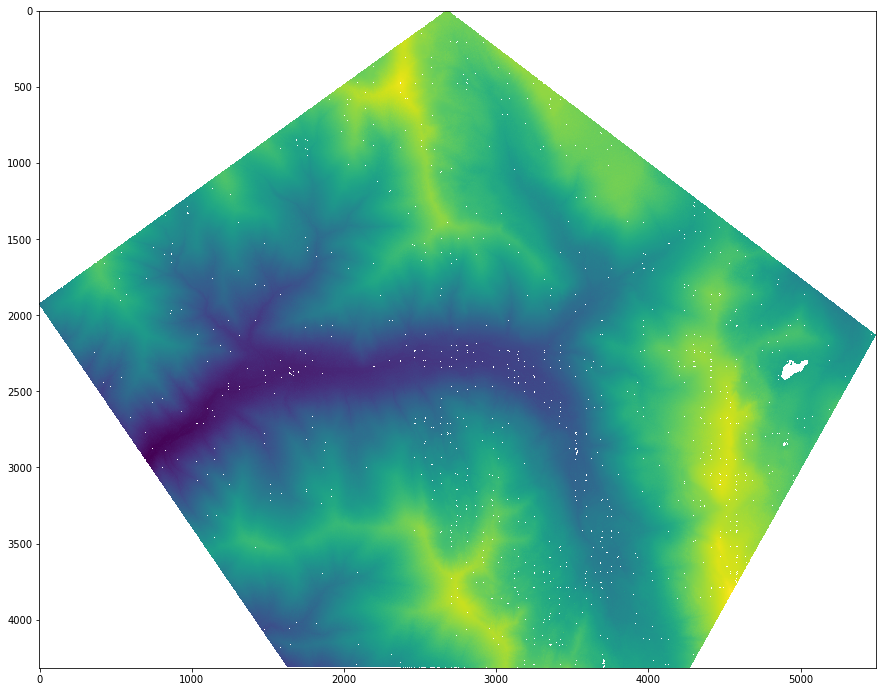

In [18]:
fig,ax = plt.subplots(figsize = (15,15))
masked_array = np.ma.array (data_array, mask=np.isnan(data_array))
cmap = matplotlib.cm.get_cmap("Greys").copy()
cmap.set_bad('white',1.)
ax.imshow(masked_array, interpolation='nearest', cmap='viridis');

## Conclusion

## Resources

### Debugging

In [ ]:
def build_pdal_pipeline(extent_epsg3857, usgs_3dep_dataset_name, pc_resolution, filterNoise = False,
                        reclassify = True, savePointCloud = True, pc_outName = 'filter_test', pc_outType = 'laz'):

    """
    Build pdal pipeline for requesting, processing, and saving point cloud data.
    
    Parameters:
        extent_epsg3857: Polygon for user-defined AOI in Web Mercator projection (EPS:3857)
                         usgs_3dep_dataset_name: name of 3DEP dataset which AOI overlaps. Polygon is generated 
                         either through the 'handle_draw' methor or by inputing their own coordinates.
                         This parameter is set automatically when the user-defined AOI is chosen.
        usgs_3dep_dataset_name: Name of the 3DEP dataset that the data will be obtained. This parameter is set 
                                automatically when the user-defined AOI is chosen.
        pc_resolution: The desired resolution of the pointcloud based on the following definition:
        
                        Source: https://pdal.io/stages/readers.ept.html#readers-ept
                            A point resolution limit to select, expressed as a grid cell edge length. 
                            Units correspond to resource coordinate system units. For example, 
                            for a coordinate system expressed in meters, a resolution value of 0.1 
                            will select points up to a ground resolution of 100 points per square meter.
                            The resulting resolution may not be exactly this value: the minimum possible 
                            resolution that is at least as precise as the requested resolution will be selected. 
                            Therefore the result may be a bit more precise than requested.
                            
        filterNoise: Option to remove points from USGS Class 7 (noise).
        savePointCloud: Option to save (or not) the point cloud dataset.
        pc_outName: Desired name of file on user's local filesystem. If savePointcloud = False, 
                  this should be outName = ''
        pc_outType:  Desired file extension. Input must be either 'las' or 'laz'. If a different file type is
        requested,the user will get error stating "Extension must be 'las' or 'laz'". If savePointcloud = False, 
        this should be outType = ''
    """
    
    url = "https://s3-us-west-2.amazonaws.com/usgs-lidar-public/{}/ept.json".format(usgs_3dep_dataset_name)
    
    ### TODO: Add a reclassify method / SMRF filter stage. (should this be in the build_pipeline or make_dem?)
    ### TODO: Add an option to choose an output CRS
    ### TODO: Add option to DEM function to specify the type of gridding method (E.g. Zmin, Zmean, Zmax, Zidw, ect)
        #DONE
    ### TODO: Add option to output shapefile of the bounding box. 
    ### Important note: smrf cannot be run in streaming mode
    ### TODO: Test performance in and out of streaming mode.
    
    #this is the basic pipeline which only accesses the 3DEP data. There is an optional
    pointcloud_pipeline = {
            "pipeline": [
                
                {
                    "type": "readers.ept",
                    "filename": str(url),
                    "polygon": str(extent_epsg3857),
                    "requests": 3,
                    "resolution": pc_resolution
                }
            ]
    }
    
    if filterNoise == True:
        
        filter_stage = {
            "type":"filters.range",
            "limits":"Classification![7:7]"
        }
        
        pointcloud_pipeline['pipeline'].append(filter_stage)
    
    if reclassify == True:
        
        remove_classes_stage = {
            "type":"filters.assign",
            "value":"Classification = 0"
        }
        
        classify_ground_stage = {
            "type":"filters.smrf"
        }
        
        reclass_stage = {
            "type":"filters.range",
            "limits":"Classification[2:2]"
        }
        
        pointcloud_pipeline['pipeline'].append(remove_classes_stage)
        pointcloud_pipeline['pipeline'].append(classify_ground_stage)
        pointcloud_pipeline['pipeline'].append(reclass_stage)
        
    if savePointCloud == True:
        
        if pc_outType == 'las':
            savePC_stage = {
                "type": "writers.las",
                "filename": str(pc_outName)+'.'+ str(pc_outType)
            }
        elif pc_outType == 'laz':    
            savePC_stage = {
                "type": "writers.las",
                "compression": "laszip",
                "filename": str(pc_outName)+'.'+ str(pc_outType)
            }
        else:
            raise Exception("pc_outType must be 'las' or 'laz'.")

        pointcloud_pipeline['pipeline'].append(savePC_stage)
        
    return pointcloud_pipeline


def make_DEM_pipeline(extent_epsg3857, usgs_3dep_dataset_name, pc_resolution, dem_resolution,
                      filterNoise = True, savePointCloud = False, pc_outName = 'filter_test', pc_outType = 'laz',
                      demType = 'dtm', gridMethod = 'idw', dem_outName = 'dem_test', dem_outExt = 'tif', driver = "GTiff"):
    
    """
    Build pdal pipeline for creating a digital elevation model (DEM) product from the requested point cloud data. The 
    user must specify whether a digital terrain (bare earth) model (DTM) or digital surface model (DSM) will be created, 
    the output DTM/DSM resolution, and the gridding method desired. 

    The `build_pdal_pipeline() method is used to request the data from the Amazon Web Services ept bucket, and the 
    user may define any processing steps (filtering or reclassifying). The user must also specify whether the point 
    cloud should be saved or not. Saving the point cloud is not necessary for the generation of the DEM. 

    Parameters:
        extent_epsg3857: Polygon for user-defined AOI in Web Mercator projection (EPS:3857)
                         usgs_3dep_dataset_name: name of 3DEP dataset which AOI overlaps. Polygon is generated 
                         either through the 'handle_draw' methor or by inputing their own coordinates.
                         This parameter is set automatically when the user-defined AOI is chosen.
        usgs_3dep_dataset_name: Name of the 3DEP dataset that the data will be obtained. This parameter is set 
                                automatically when the user-defined AOI is chosen.
        pc_resolution: The desired resolution of the pointcloud based on the following definition:

                        Source: https://pdal.io/stages/readers.ept.html#readers-ept
                            A point resolution limit to select, expressed as a grid cell edge length. 
                            Units correspond to resource coordinate system units. For example, 
                            for a coordinate system expressed in meters, a resolution value of 0.1 
                            will select points up to a ground resolution of 100 points per square meter.
                            The resulting resolution may not be exactly this value: the minimum possible 
                            resolution that is at least as precise as the requested resolution will be selected. 
                            Therefore the result may be a bit more precise than requested.

        dem_resolution: Desired grid size (in meteres) for output raster DEM 
        filterNoise: Option to remove points from USGS Class 7 (noise).
        savePointCloud: Option to save (or not) the point cloud dataset.
        pc_outName: Desired name of file on user's local filesystem. If savePointcloud = False, 
                  this should be outName = ''
        pc_outType:  Desired file extension. Input must be either 'las' or 'laz'. If a different file type is requested,
                  the user will get error stating "Extension must be 'las' or 'laz'". If savePointcloud = False, 
                  this should be outType = ''
        demType: Type of DEM produced. Input must 'dtm' (digital terrain model) or 'dsm' (digital surface model).
        gridMethod: Method used. Options are 'min', 'mean', 'max', 'idw'. ELABORATE MORE HERE.
        dem_outName: Desired name of DEM file on user's local filesystem.
        dem_outExt: DEM file extension. ELABORATE MORE HERE.
        driver: Driver used. ELABORATE MORE HERE.

    """

    dem_pipeline = build_pdal_pipeline(extent_epsg3857, usgs_3dep_dataset_name, pc_resolution,
                                              filterNoise, savePointCloud, pc_outName, pc_outType)
    
    if demType == 'dsm':
        dem_stage = {
                "type":"writers.gdal",
                "filename":str(dem_outName)+ '.' + str(dem_outExt),
                "gdaldriver":driver,
                "nodata":-9999,
                "output_type":gridMethod,
                "resolution":float(dem_resolution),
                "gdalopts":"COMPRESS=LZW,TILED=YES,blockxsize=256,blockysize=256,COPY_SRC_OVERVIEWS=YES"
        }
    
    elif demType == 'dtm':
        groundfilter_stage = {
                "type":"filters.range",
                "limits":"Classification[2:2]"
        }

        dem_pipeline['pipeline'].append(groundfilter_stage)

        dem_stage = {
                "type":"writers.gdal",
                "filename":str(dem_outName)+ '.' + str(dem_outExt),
                "gdaldriver":driver,
                "nodata":-9999,
                "output_type":gridMethod,
                "resolution":float(dem_resolution),
                "gdalopts":"COMPRESS=LZW,TILED=YES,blockxsize=256,blockysize=256,COPY_SRC_OVERVIEWS=YES"
        }
    
    else:
        raise Exception("demType must be 'dsm' or 'dtm'.")
        
        
    dem_pipeline['pipeline'].append(dem_stage)
        
    return dem_pipeline

In [ ]:
pointcloud_resolution

In [ ]:
pointcloud_resolution = user_resolution.value
pipeline = build_pdal_pipeline(AOI_EPSG3857_wtk, usgs_3dep_dataset, pointcloud_resolution, filterNoise = False,
                        reclassify = True, savePointCloud = True, pc_outName = 'reclassify_test', pc_outType = 'laz')

In [ ]:
pipeline = pdal.Pipeline(json.dumps(pipeline))

In [ ]:
pipeline.execute()

In [ ]:
dtm_resolution = 5.0
dem_pipeline = make_DTM_pipeline(AOI_EPSG3857_wtk, usgs_3dep_dataset, pointcloud_resolution, dtm_resolution,
                      filterNoise = True, savePointCloud = False, pc_outName = '', pc_outType = '', 
                      demType = 'dsm', dem_outName = 'dsm_test', driver = "GTiff")

In [ ]:
dem_pipeline

In [ ]:
dem_pipeline = pdal.Pipeline(json.dumps(dem_pipeline))

In [ ]:
build_dem = dem_pipeline.execute_streaming(chunk_size=1000000)
print(dem_pipeline.log)

reclassify_stage =
    
    {
        "type":"filters.assign"
        "value":"Classification = Classification[0]}
    }